# Taller - Procesamiento de señales ECG

* Cargue y grafique la señal ECG del archivo 0001m.mat, con una frecuencia
de muestreo de 256Hz.
* Implemente el algoritmo Pan-Tompkins para este archivo, graficando cada
uno de los pasos, como en la diapositiva 14. Para los pasos de
diferenciación e integración, utilice una ventana b apropiada y la función
filter. Nota: Como es un filtro FIR, sólo tiene b y a = 1 (Ver ejemplo en la
ayuda de filter())
* Realice la umbralización estadística sobre la señal integrada, y utilice
findpeaks, para encontrar los picos R.
* Diseñe una estrategia para encontrar el pico de las ondas P, Q, S, y T. Puede
aislar la ventana de cada evento (loc de pico R +/- 300 o 400 ms) y
encontrar los mínimos y máximos en la ventana antes y después de cada R.
* A partir de los picos R, calcule el tacograma (HRV). Además, calcule la
frecuencia cardiaca global. Dé los valores en bpm.

### Configuramos el entorno con Librerías y Cargamos el Dataset

In [167]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sci
import scipy.signal as sign
import pprint as pp

# Configurar ruta del dataset
DATADIR = Path().resolve() / "../data"
ECG_DF = DATADIR / "0001m.mat"
# Cargar dataset de Matlab
ECG_Data = sci.loadmat(ECG_DF)
samples = ECG_Data['val'][0]
fs = 256

# Preparar pprint para que imprima datos con orden
pp.PrettyPrinter( indent=4 )
pp.pprint(f"Dataset -> {ECG_Data}")
pp.pprint(f"Shape -> {np.shape(ECG_Data['val'][0])}")
pp.pprint(f"Samples -> {samples}")


"Dataset -> {'val': array([[-83, -78, -86, ..., -41, -49, -46]], dtype=int16)}"
'Shape -> (1000000,)'
'Samples -> [-83 -78 -86 ... -41 -49 -46]'


* Cargando señal ECG con frecuentia de muestra de *256Hz*
* Crear método para graficar señales

In [168]:
# calcular el tiempo total de la señal en segundos
t_seconds = len(samples) / fs
# Crear el vector de tiempo a partir de la señal en segundos, según la frecuencia de muestreo = 256Hz
v_time   = np.linspace(0.0, t_seconds, samples.size, dtype=float)

# Configuramos la gráfica
def plotCelPotential(title:str, label_name:str, time_vec:list, samples:list, zero_vec:list, xlabel:str, ylabel:str, peaks:list, plot_xlim:int):
    fig, ax = plt.subplots( 1, 1, sharey=True, figsize=(18, 4) )
    ax.set_title( title )
    ax.plot( time_vec, samples, label=label_name, color="b" )
    if ( peaks is not None ):
        ax.plot( time_vec[peaks], samples[peaks], "x", label="Peaks", color="magenta" )
    if ( zero_vec is not None ):
        zero_vec[peaks] = samples[peaks]
        ax.plot( time_vec, zero_vec, label="zero", color="red" )
    ax.set_xlabel( xlabel, 
            loc="center")
    ax.set_ylabel( ylabel, 
            loc="center")
    ax.grid( visible=True, which="both", axis="both" )
    if ( plot_xlim > 0 ):
        plt.xlim( 0, plot_xlim )
    ax.legend()
    plt.tight_layout()
    plt.show()

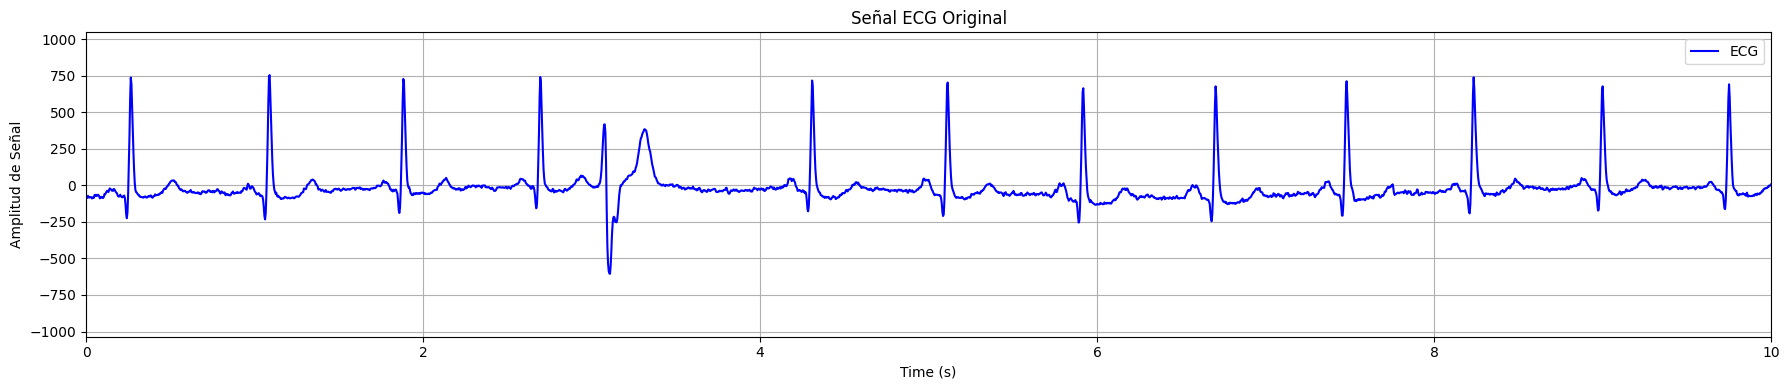

In [169]:
plotCelPotential("Señal ECG Original", "ECG", v_time, samples, None, "Time (s)", "Amplitud de Señal", None, 10)

### Aplicando el algoritmo Pan-Tompkins

* Filtro Pasa Alta

In [170]:
def band_filter(data, band_cut, fs, order=5, filtype="high"):
    nyquist = 0.5 * fs # Calculamos la frecuencia de nyquist
    threshold = band_cut / nyquist # Normalizando la banda
    pp.pprint(f"threshold: {filtype} -> {threshold}")
    b, a = sign.butter(order, threshold, filtype, analog=False)
    applyed_filter = sign.filtfilt(b, a, data)
    return applyed_filter

* Derivación de la señal, Cuadrado de la señal, y Integración con una ventana de movimiento

In [171]:
# Derivación de la señal
def signal_derivative(samples):
    return np.diff(samples)

# Cuadrado de la señal
def square_signal(samples):
    return samples ** 2

In [172]:
# Filtro la señal con el filtro pasa alta y pasa baja
high_Hz_cut    = 5.0
low_Hz_cut     = 15.0
filtered_signal = band_filter(samples, low_Hz_cut, fs, filtype="low")
filtered_signal = band_filter(filtered_signal, high_Hz_cut, fs, filtype="high")

# creo un nuevo arreglo para la gráfica filtrada
v_time2 = np.arange(filtered_signal.size) / fs

'threshold: low -> 0.1171875'
'threshold: high -> 0.0390625'


* Crear señal derivativa

In [173]:
deiff_sign  = signal_derivative(filtered_signal)
# creo un nuevo arreglo para la gráfica filtrada
v_time3     = np.arange(deiff_sign.size) / fs

In [174]:
# Creamos señal cuadrada
sign_toPower    = square_signal(filtered_signal)
v_time4         = np.arange(sign_toPower.size) / fs

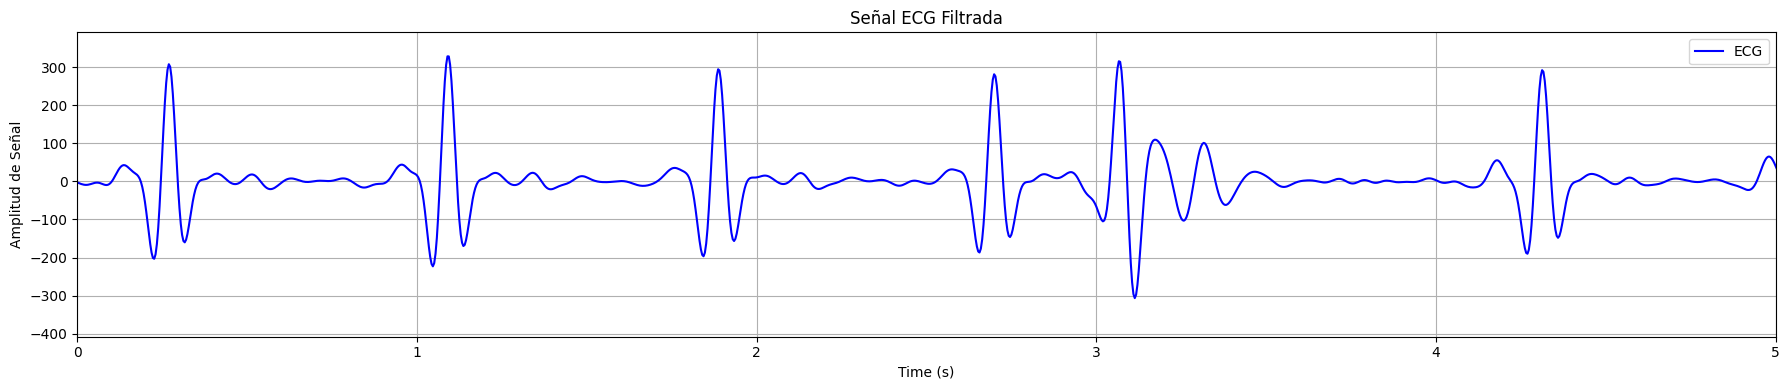

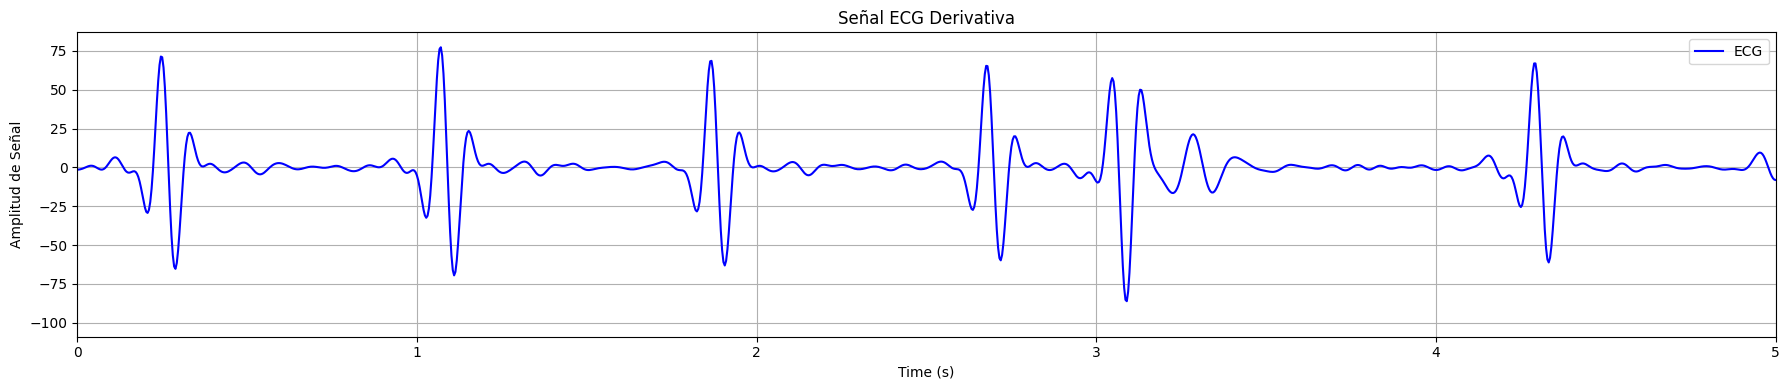

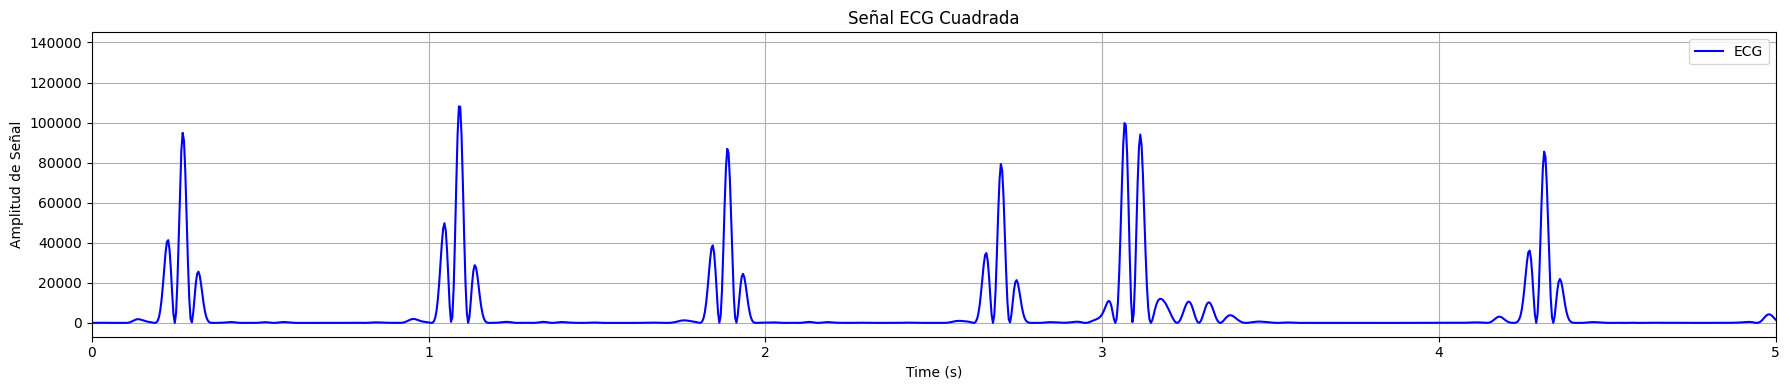

In [176]:
# gráfica Señal ECG Filtrada
plotCelPotential("Señal ECG Filtrada", "ECG", v_time2, filtered_signal, None, "Time (s)", "Amplitud de Señal", None, 5)
# gráfica Señal ECG Derivativa
plotCelPotential("Señal ECG Derivativa", "ECG", v_time3, deiff_sign, None, "Time (s)", "Amplitud de Señal", None, 5)
# gráfica Señal ECG Cuadrada
plotCelPotential("Señal ECG Cuadrada", "ECG", v_time4, sign_toPower, None, "Time (s)", "Amplitud de Señal", None, 5)